In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constantes
r_bohr = 5.29177e-11  # Raio de Bohr em metros
m_H = 1.67e-27  # Massa do núcleo de hidrogênio em kg

# Propriedades das esferas
R = r_bohr  # Raio das esferas (raio de Bohr)
m = m_H  # Massa das esferas (massa do núcleo de hidrogênio)

# Parâmetros da simulação
tempo_total = 10  # Tempo total da simulação em segundos
dt = 0.05  # Intervalo de tempo em segundos
n_iteracoes = int(tempo_total / dt) # Número de iterações

# Condições iniciais

vx0_1 = 0
vy0_1 = 0
vx0_2 = -10*R
vy0_2 = -10*R
px0_1 = 0
py0_1 = 0
px0_2 = 40*R
py0_2 = 40*R

velocidade_inicial1 = np.array([vx0_1, vy0_1])  # Posição inicial das esferas
velocidade_inicial2 = np.array([vx0_2, vy0_2])  # Posição inicial das esferas

posicao_inicial1 = np.array([px0_1, py0_1])  # Velocidade inicial das esferas
posicao_inicial2 = np.array([px0_2, py0_2])  # Velocidade inicial das esferas

In [25]:
def nova_posicao_velocidade(x, v, dt):
    # Derivadas em t
    k1 = v * dt
    m1 = np.zeros_like(v)  # Não consideraremos acelerações aqui

    # Derivadas em t + dt/2
    k2 = (v + 0.5 * m1) * dt
    m2 = np.zeros_like(v)  # Não consideraremos acelerações aqui

    # Derivadas em t + dt
    k3 = (v + m2) * dt
    m3 = np.zeros_like(v)  # Não consideraremos acelerações aqui

    # Atualização da posição e da velocidade usando o método de Simpson
    nova_posicao = x + k1 + 4 * k2 + k3
    nova_velocidade = v + (m1 + 4 * m2 + m3) / 6

    return nova_posicao, nova_velocidade

In [26]:
# Atualização da posição e da velocidade com colisões nas paredes
def posicao_velocidade_colisao_parede(x, v, dt):
    nova_posicao, nova_velocidade = nova_posicao_velocidade(x, v, dt)

    # Lógica para colisões com as paredes da caixa
    for i in range(2):
        for j in range(2):
            if nova_posicao[i, j] < -50 * R or nova_posicao[i, j] > 50 * R:
                nova_velocidade[i, j] = -nova_velocidade[i, j]

    return nova_posicao, nova_velocidade

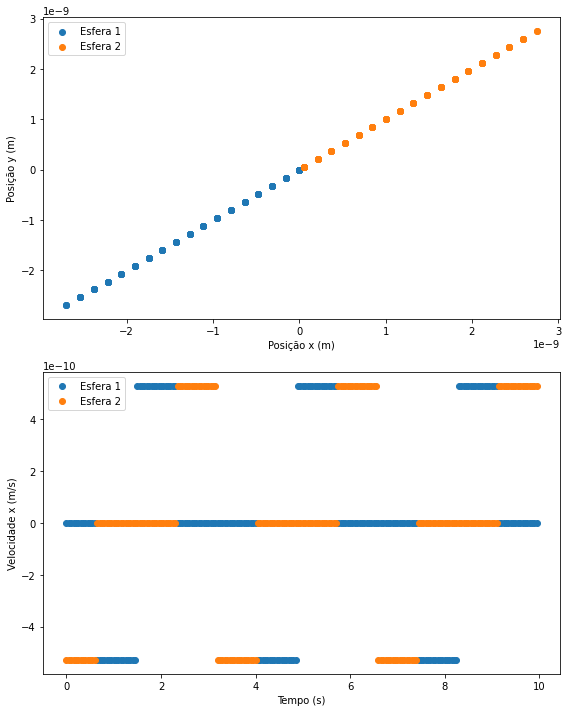

In [27]:
# Inicialização de arrays para armazenar os resultados
posicoes = np.zeros((n_iteracoes, 2, 2))
velocidades = np.zeros((n_iteracoes, 2, 2))

# Condições iniciais
posicoes[0] = np.array([posicao_inicial1, posicao_inicial2])
velocidades[0] = np.array([velocidade_inicial1, velocidade_inicial2])

# Simulação
for step in range(1, n_iteracoes):
    posicoes[step], velocidades[step] = posicao_velocidade_colisao_parede(
        posicoes[step - 1], velocidades[step - 1], dt
    )

    # Detecção e tratamento de colisões
    distance = np.linalg.norm(posicoes[step, 0] - posicoes[step, 1])
    if distance <= 2 * R:  # Colisão ocorreu
        # Calcular novas velocidades após a colisão (conservação do momento)
        v1_f = velocidades[step, 0] - 2 * m / (m + m) * np.dot(velocidades[step, 0] - velocidades[step, 1], posicoes[step, 0] - posicoes[step, 1]) / np.linalg.norm(posicoes[step, 0] - posicoes[step, 1]) ** 2 * (posicoes[step, 0] - posicoes[step, 1])
        v2_f = velocidades[step, 1] - 2 * m / (m + m) * np.dot(velocidades[step, 1] - velocidades[step, 0], posicoes[step, 1] - posicoes[step, 0]) / np.linalg.norm(posicoes[step, 1] - posicoes[step, 0]) ** 2 * (posicoes[step, 1] - posicoes[step, 0])
        
        # Atualizar as velocidades após a colisão
        velocidades[step, 0] = v1_f
        velocidades[step, 1] = v2_f

# Visualização dos gráficos da posição e da velocidade
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.scatter(posicoes[:, 0, 0], posicoes[:, 0, 1], label="Esfera 1")
ax1.scatter(posicoes[:, 1, 0], posicoes[:, 1, 1], label="Esfera 2")
ax1.set_xlabel("Posição x (m)")
ax1.set_ylabel("Posição y (m)")
ax1.legend()

ax2.scatter(np.arange(n_iteracoes) * dt, velocidades[:, 0, 0], label="Esfera 1")
ax2.scatter(np.arange(n_iteracoes) * dt, velocidades[:, 1, 0], label="Esfera 2")
ax2.set_xlabel("Tempo (s)")
ax2.set_ylabel("Velocidade x (m/s)")
ax2.legend()

plt.tight_layout()
plt.show()

In [28]:
# Função para criar a animação
def animate_positions(i):
    ax.clear()
    ax.scatter(posicoes[i, 0, 0], posicoes[i, 0, 1], c='blue', label="Esfera 1")
    ax.scatter(posicoes[i, 1, 0], posicoes[i, 1, 1], c='red', label="Esfera 2")
    ax.set_xlim(-50 * R, 50 * R)
    ax.set_ylim(-50 * R, 50 * R)
    ax.set_xlabel("Posição x (m)")
    ax.set_ylabel("Posição y (m)")
    ax.set_title(f"Tempo = {i * dt:.2f} segundos")
    ax.legend()

# Criação da animação em formato de GIF
fig, ax = plt.subplots(figsize=(8, 8))
ani = FuncAnimation(fig, animate_positions, frames=n_iteracoes, interval=100)
plt.close()

# Salvando o GIF
gif_filename = "collision_simulation.gif"
ani.save(gif_filename, writer="imagemagick")
print("GIF criado com sucesso:", gif_filename)

MovieWriter imagemagick unavailable; using Pillow instead.


GIF criado com sucesso: collision_simulation.gif
